<a href="https://colab.research.google.com/github/suphalaksana/Multivariate/blob/main/Multivariate_Exam222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'ศุภลักษณา  บัวจันทร์'
ID = '6230205404'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:20


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,3.773747,6.061187,-9.222883,-8.954075,6.305175,0.292267,7.613113,1.220585,7.528680,-0.619801,7.349913,-2.810641,-3.111243,-1.079978,-2.554639,6.921826,-2.531105,-3.615193,-1.092670,-0.952016,3.812928,-7.987567,4.027819,-2.660919,7.456041,-7.316476,5.960466,-2.767330,-8.676474,5.676556,12.122375,30.382779
1,8.484404,-5.319557,-8.296086,-3.727046,3.417146,-2.354321,-3.198962,-5.068781,9.627884,-1.186137,7.624599,3.679341,-6.719260,9.427014,0.545413,-8.229463,0.397966,-6.307839,3.660300,-3.227168,-6.623447,9.712237,-7.599891,4.959062,2.586674,7.743150,-1.866618,-9.646674,-0.839624,-4.623120,-10.639114,-21.115602
2,-0.885176,-2.064377,-1.735326,7.347219,2.895234,-6.591421,4.689732,-1.831760,5.527787,-2.187902,-4.621077,-2.095996,-6.282829,-6.921801,-3.469243,3.709721,1.311006,8.423316,4.180588,-7.635288,8.171219,-4.399013,-8.206858,-2.485293,2.718617,-3.658901,-3.315503,8.318886,9.889534,4.934751,-4.128754,26.673756
3,0.928953,-3.955223,-7.030693,9.744129,-0.342992,1.773401,-7.167229,4.207292,3.302174,3.398619,5.902347,6.416682,-1.720844,8.569327,-9.563628,5.719072,6.597021,0.552377,3.057767,9.206791,-3.929266,-0.312406,-0.848727,5.037263,-9.414485,-8.538412,-6.457095,8.513097,-3.362707,4.125484,-7.910447,22.627419
4,-5.690987,-3.517787,-2.858825,-7.169143,-5.605544,-9.054258,6.521987,-0.913724,-7.339663,-9.462569,1.945500,-4.143945,1.903859,-0.889551,9.734788,2.465684,-0.186815,10.274393,5.035283,-7.027597,-8.250220,0.108123,6.192776,2.864375,-6.834458,-2.341450,-6.447813,-8.751939,-7.332672,5.696778,-7.035574,30.483889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.631343,-5.922440,-7.594832,-1.042551,3.699737,0.414187,-1.054134,-8.502152,8.658479,4.100714,7.837780,3.280779,-7.556245,7.024185,-1.320418,-9.951174,-0.452707,-5.646853,5.616549,-4.387339,-7.612117,9.434799,-7.439684,5.362935,5.604233,7.636980,-3.764263,-9.298095,-4.074592,-3.094425,-11.844880,-13.472124
9996,-9.164097,3.211174,-1.865883,-9.905384,-3.836890,7.568548,-5.732555,-7.434602,-5.328562,11.115293,2.945332,1.038299,0.860420,7.597590,-0.083376,4.711684,6.783715,8.115086,-7.911840,-3.839552,6.007630,-0.106223,-2.183768,3.416250,2.309178,-3.919674,4.573433,-5.643815,6.567515,-10.614089,6.422348,-51.070443
9997,-4.069899,-2.351560,-0.134604,-5.629799,-5.620890,-9.770339,6.168892,0.835266,-3.912655,-7.703638,1.361204,-3.658080,2.902530,-0.667720,7.789704,2.017346,1.698594,8.220736,4.792831,-8.864895,-8.932504,-0.911860,4.953654,-1.065717,-6.648004,-2.566931,-6.526202,-7.488712,-6.361973,5.717083,-4.703120,30.585414
9998,4.873270,-1.541458,-7.629112,2.557538,8.061374,9.162759,5.372126,1.288333,-8.305103,6.020796,3.953505,0.351103,4.409830,8.857026,-6.120125,-5.882252,-1.019697,-3.206716,-3.188903,4.414865,2.048225,-6.216080,0.629628,-5.189581,-8.773632,3.442669,10.901293,-8.050083,-2.491982,-5.548942,-3.082917,-25.744708


#2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

ข้อมูลชุดนี้ไม่มี ที่เป็นข้อความแล้ว มีแต่ที่เป็นตัวเลขจึงไม่ต้องตัด column ใดออก

#ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [6]:
Data.shape #มี Data 10000 ตัว และมี 32 dimensions  
#dimensions เยอะมาก ต้องทำการลด dimensions ลงโดยทำการตัด colums ที่ซ้ำกันออกไปแต่ ข้อมูลชุดนี้ไม่มี ที่เป็นข้อความแล้ว มีแต่ที่เป็นตัวเลขจึงไม่ต้องตัดแถวใดออก

(10000, 32)

#ลอง plot scatter matrix เพื่อดูการกระจาย ของ data ใน มุมมองต่างๆ

In [7]:
import pandas as pd

In [8]:
#pd.plotting.scatter_matrix(Data)  #dimension เยอะไปทำให้มองไม่ออก

#ตรวจสอบว่าละหว่าง columns มี correlationกันมากน้อยแค่ไหน ด้วย numpy

In [9]:
import numpy as np #numpy ใช้กับข้อมูลที่เป็นตัวเลข

In [11]:
corr = np.corrcoef(Data.to_numpy().T)

In [12]:
corr.shape #ดูขนาดของ correlation

(32, 32)

In [13]:
corr

array([[ 1.        ,  0.01185574, -0.01839796, ...,  0.14290484,
         0.01185574,  0.14290484],
       [ 0.01185574,  1.        ,  0.20075925, ...,  0.08729637,
         1.        ,  0.08729637],
       [-0.01839796,  0.20075925,  1.        , ..., -0.07158635,
         0.20075925, -0.07158635],
       ...,
       [ 0.14290484,  0.08729637, -0.07158635, ...,  1.        ,
         0.08729637,  1.        ],
       [ 0.01185574,  1.        ,  0.20075925, ...,  0.08729637,
         1.        ,  0.08729637],
       [ 0.14290484,  0.08729637, -0.07158635, ...,  1.        ,
         0.08729637,  1.        ]])

In [15]:
for i in range(corr.shape[0] ): #วน loop เพื่อดูว่ามีค่า correlation ใด มีค่าเท่ากับ 1 โดยไม่เอาค่าจากเส้นทแยงมุม
  for j in  range(corr.shape[1] ):# cor ว่าถ้าเป็น 1 คือซ้ำกัน  มีแถวซ้ำแค่ 2แถว คือ  1 กับ 30  ,29 กับ 31  ที่เหลือคือสลับที่กัน
    if( i !=j) and (corr [i,j] == 1.):
      print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


In [20]:
Data.iloc[:5,29:32]  #ดูแถวที่ซ้ำกัน

,29,30,31
0,5.676556,12.122375,30.382779
1,-4.623120,-10.639114,-21.115602
2,4.934751,-4.128754,26.673756
3,4.125484,-7.910447,22.627419
4,5.696778,-7.035574,30.483889


In [22]:
from matplotlib import pyplot as plt

#data ที่มี correlation เป็น 1

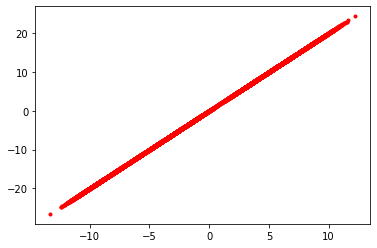

In [26]:
plt.plot(Data.iloc[:,1],Data.iloc[:,30],'r.')   #กราฟแบบนี้แปลว่ามี column ที่ซ้ำกันควรลบออก

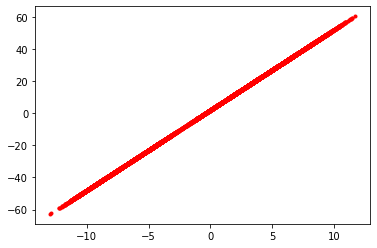

In [27]:
plt.plot(Data.iloc[:,29],Data.iloc[:,31],'r.')  

#data ที่มี correlation เป็นค่าอื่นๆ

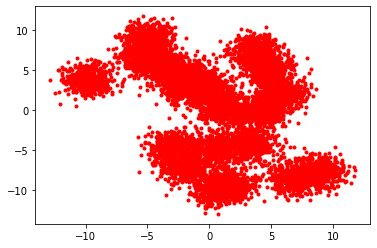

In [28]:
plt.plot(Data.iloc[:,11],Data.iloc[:,29],'r.')

#ลบ column ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column อื่น

หลัก ตั้ง คอมลัม นอน ดูว่าซ้ำกันยังไง ดูที่ค่า cor ว่าถ้าเป็น 1 คือซ้ำกัน

In [30]:
newdata_dropped = Data.drop(['30','31''],axis=1)
newdata_dropped

SyntaxError: ignored